In [1]:
!pip install wordcloud

                                              0.0/222.8 kB ? eta -:--:--
     -------------------------------------- 222.8/222.8 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp311-cp311-win_amd64.whl size=152781 sha256=83b504e54bca1228b97528f6e6682353aa432e02c7e1fff2b6ca9adb70e17931
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b7\14\d8\f10236cee8e25843111cceaa8aa6bbd35bfad15bdf576ed660
Successfully built wordcloud


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [14]:
import nltk

In [15]:
tm_data = pd.read_csv('tourist_accommodation_reviews.csv', encoding = 'Windows-1252')

In [16]:
tm_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [17]:
tm_data.shape

(53644, 5)

In [18]:
tm_data.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [19]:
tm_data.columns

Index(['ID', 'Review Date', 'Location', 'Hotel/Restaurant name', 'Review'], dtype='object')

In [20]:
tm_data['Location'].value_counts()

Location
 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: count, dtype: int64

In [21]:
location_count = tm_data['Location'].value_counts().reset_index()
location_count.head()

,Location,count
0,Patong,16403
1,Karon,5826
2,Kata Beach,5752
3,Rawai,3811
4,Choeng Thale,3378


In [22]:
location_count.columns = ['Location','Count']
location_count.head()

,Location,Count
0,Patong,16403
1,Karon,5826
2,Kata Beach,5752
3,Rawai,3811
4,Choeng Thale,3378


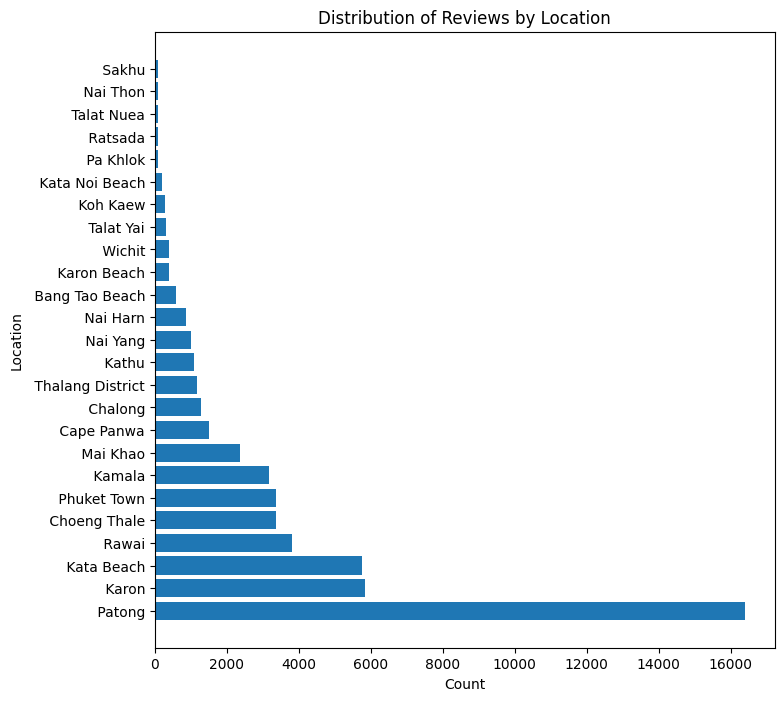

In [23]:
plt.figure(figsize = (8,8))
plt.barh(location_count['Location'], location_count['Count'])
plt.xlabel('Count')
plt.ylabel('Location')
plt.title("Distribution of Reviews by Location")
plt.show()

In [24]:
tm_selection = tm_data[tm_data['Location'] == ' Patong'] 

In [25]:
restaurants_index = np.arange(0,30)
restaurants_list = tm_selection['Hotel/Restaurant name'].unique()[restaurants_index]
restaurants = tm_selection['Hotel/Restaurant name'].isin(restaurants_list)

In [26]:
new_tm_data = tm_selection[restaurants]

In [27]:
new_tm_data

,ID,Review Date,Location,Hotel/Restaurant name,Review
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...
...,...,...,...,...,...
11003,rn535287593,"Reviewed October 23, 2017",Patong,YamThai Restaurant,Think about this restaurant YamThai when you w...
11004,rn535281383,"Reviewed October 23, 2017",Patong,YamThai Restaurant,Me and my friend had very delicious food in th...
11005,rn535087530,"Reviewed October 22, 2017",Patong,YamThai Restaurant,"We wanted to try a few local dishes, so the Th..."
11006,rn535084035,"Reviewed October 22, 2017",Patong,YamThai Restaurant,The food is very very poor. The usual Thai fla...


In [28]:
new_tm_data['Hotel/Restaurant name'].value_counts()

Hotel/Restaurant name
Sam's Steaks and Grill                      100
Highway Curry Indian & Thai Cuisine         100
No 9 2nd Restaurant                         100
EuroThai Restaurant                         100
Poo Nurntong Restaurant                     100
Kantok Restaurant at Burasari Resort        100
Soul Curry Restaurant and Bar               100
Home Dining Cafe & Lounge                   100
BYD Lofts Restaurant Bistro & Bar           100
Rosco's Restaurant & Sports Bar             100
ICC Indian Curry Club                       100
Halfway Inn (Restaurant)                    100
Sandwich Shoppe Cafe & Bar Patong Phuket    100
La Gritta                                   100
The Blue Mango Bar and Grill                100
Vista                                       100
Trattoria Capri da Rico                     100
Rustic - Eatery & Bar                       100
Salute Italian Restaurant                   100
i-Kroon Cafe                                100
La Dolce Vita Rest

In [29]:
new_tm_data[restaurants]['Hotel/Restaurant name'].nunique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\2390654296.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_tm_data[restaurants]['Hotel/Restaurant name'].nunique()


30

In [30]:
def preprocess_text(text):
  # Tokenization
  tokenized_text = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  # Removing stop words
  stop_words = nltk.corpus.stopwords.words('english')
  cleaned_tokens = [word.lower() for word in tokenized_text if word.lower() not in stop_words]
  # Stemming
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [31]:
prep_text = new_tm_data['Review'].apply(preprocess_text)

In [32]:
prep_text.head()

793    [expens, comparison, local, restaur, that', ap...
794    [walk, pass, holiday, inn, decid, last, minut,...
795    [atmospher, 70', great, comfort, armchair, eff...
796    [made, reserv, last, minut, dine, sam, stay, h...
797    [great, time, celebr, son, birthday, trip, phu...
Name: Review, dtype: object

## Sentiment Analysis

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [34]:
new_tm_data.count()

ID                       2980
Review Date              2980
Location                 2980
Hotel/Restaurant name    2980
Review                   2980
dtype: int64

In [35]:
new_tm_data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2980,2980,2980,2980,2980
unique,2930,719,1,30,2930
top,rn562370602,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,Really lovely burger place with a variation of...
freq,4,68,2980,100,4


In [36]:
print(sentiment.polarity_scores('I love the football'))
print(sentiment.polarity_scores('I dislike the football'))

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}


In [37]:
# Getting the sentiment scores for all reviews in the 'Review' column from the dataset and adding their respective
# compound, negative, neutral and poitive sentiment scores to the dataframe
new_tm_data['compound'] = [sentiment.polarity_scores(texts)['compound'] for texts in new_tm_data['Review']]
new_tm_data['neg'] = [sentiment.polarity_scores(texts)['neg'] for texts in new_tm_data['Review']]
new_tm_data['neu'] = [sentiment.polarity_scores(texts)['neu'] for texts in new_tm_data['Review']]
new_tm_data['pos'] = [sentiment.polarity_scores(texts)['pos'] for texts in new_tm_data['Review']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\1364385538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tm_data['compound'] = [sentiment.polarity_scores(texts)['compound'] for texts in new_tm_data['Review']]
C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\1364385538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tm_data['neg'] = [sentiment.polarity_scores(texts)['neg'] for texts in new_tm_data['Review']]
C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\1364385538.py:5: SettingWithCo

In [38]:
new_tm_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,0.8674,0.0,0.821,0.179
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,0.4939,0.0,0.903,0.097
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",0.9839,0.0,0.543,0.457
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,0.9626,0.0,0.675,0.325
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,0.9258,0.0,0.684,0.316


In [39]:
new_tm_data[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2980.000000,2980.000000,2980.000000,2980.000000
mean,0.735585,0.019551,0.722878,0.257566
std,0.349821,0.039424,0.126578,0.134072
min,-0.933600,0.000000,0.257000,0.000000
25%,0.718400,0.000000,0.639000,0.158750
50%,0.879400,0.000000,0.727000,0.254000
75%,0.938225,0.031000,0.813000,0.347000
max,0.990300,0.377000,1.000000,0.743000


<Axes: xlabel='compound', ylabel='Count'>

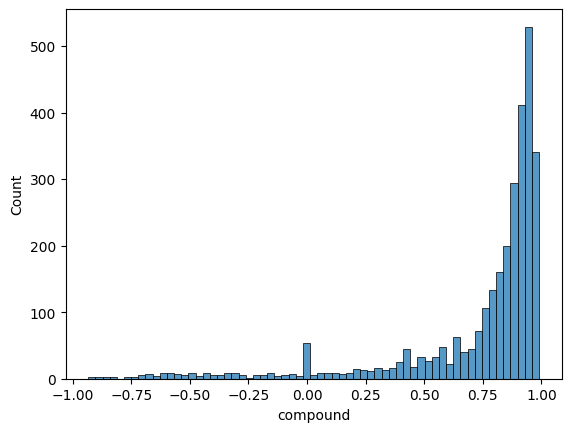

In [40]:
sns.histplot(new_tm_data['compound'])

<Axes: xlabel='pos', ylabel='Count'>

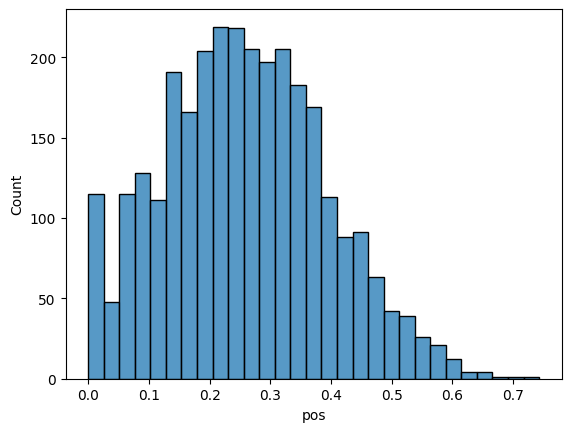

In [41]:
sns.histplot(new_tm_data['pos'])

<Axes: xlabel='neg', ylabel='Count'>

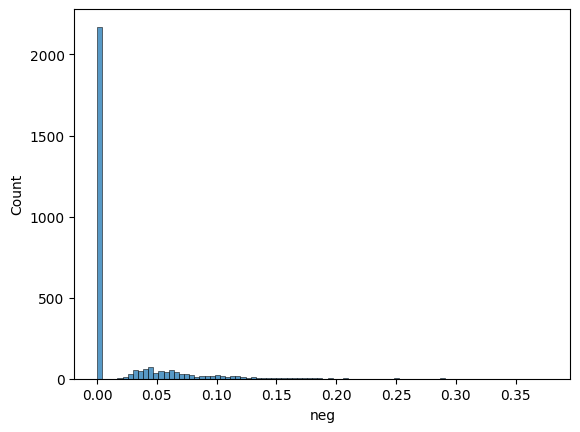

In [42]:
sns.histplot(new_tm_data['neg'])

In [43]:
(new_tm_data['compound']<=0).groupby(new_tm_data['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Ao Chalong Yacht Club Restaurant             2
Austrian Garden Restaurant                   4
BYD Lofts Restaurant Bistro & Bar            6
Climax on Bangla                             4
EuroThai Restaurant                         13
Halfway Inn (Restaurant)                    10
Highway Curry Indian & Thai Cuisine          3
Home Dining Cafe & Lounge                    8
ICC Indian Curry Club                       21
Kantok Restaurant at Burasari Resort         7
La Dolce Vita Restaurant                     6
La Gritta                                    8
Le Brooklyn Patong                           5
Natural Efe Macrobiotic World                5
Naughty Nuri's Phuket                        8
No 9 2nd Restaurant                         12
Pizzeria Da Moreno                          12
Poo Nurntong Restaurant                      6
Rosco's Restaurant & Sports Bar              7
Rustic - Eatery & Bar                        4
Salute Italian Restaurant             

In [44]:
(new_tm_data['compound']>0).groupby(new_tm_data['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Ao Chalong Yacht Club Restaurant            98
Austrian Garden Restaurant                  88
BYD Lofts Restaurant Bistro & Bar           94
Climax on Bangla                            96
EuroThai Restaurant                         87
Halfway Inn (Restaurant)                    90
Highway Curry Indian & Thai Cuisine         97
Home Dining Cafe & Lounge                   92
ICC Indian Curry Club                       79
Kantok Restaurant at Burasari Resort        93
La Dolce Vita Restaurant                    94
La Gritta                                   92
Le Brooklyn Patong                          88
Natural Efe Macrobiotic World               95
Naughty Nuri's Phuket                       92
No 9 2nd Restaurant                         88
Pizzeria Da Moreno                          83
Poo Nurntong Restaurant                     94
Rosco's Restaurant & Sports Bar             93
Rustic - Eatery & Bar                       96
Salute Italian Restaurant             

In [45]:
neg_percent = pd.DataFrame((new_tm_data['compound']<=0).groupby(new_tm_data['Hotel/Restaurant name']).sum()/
                          new_tm_data['Hotel/Restaurant name'].groupby(new_tm_data['Hotel/Restaurant name']).count()*100,
                          columns=['% of negative reviews']).sort_values(by='% of negative reviews')

neg_percent

,% of negative reviews
Hotel/Restaurant name,
Sam's Steaks and Grill,1.000000
Ao Chalong Yacht Club Restaurant,2.000000
Sandwich Shoppe Cafe & Bar Patong Phuket,3.000000
Highway Curry Indian & Thai Cuisine,3.000000
Climax on Bangla,4.000000
Salute Italian Restaurant,4.000000
Rustic - Eatery & Bar,4.000000
Austrian Garden Restaurant,4.347826
Natural Efe Macrobiotic World,5.000000


In [46]:
pos_percent = pd.DataFrame((new_tm_data['compound']>0).groupby(new_tm_data['Hotel/Restaurant name']).sum()/
                          new_tm_data['Hotel/Restaurant name'].groupby(new_tm_data['Hotel/Restaurant name']).count()*100,
                          columns=['% of positive reviews']).sort_values(by='% of positive reviews')

pos_percent

,% of positive reviews
Hotel/Restaurant name,
ICC Indian Curry Club,79.000000
EuroThai Restaurant,87.000000
Pizzeria Da Moreno,87.368421
No 9 2nd Restaurant,88.000000
YamThai Restaurant,90.000000
Halfway Inn (Restaurant),90.000000
Sizzle Rooftop Restaurant,91.000000
La Gritta,92.000000
Naughty Nuri's Phuket,92.000000


<Axes: xlabel='% of negative reviews', ylabel='Hotel/Restaurant name'>

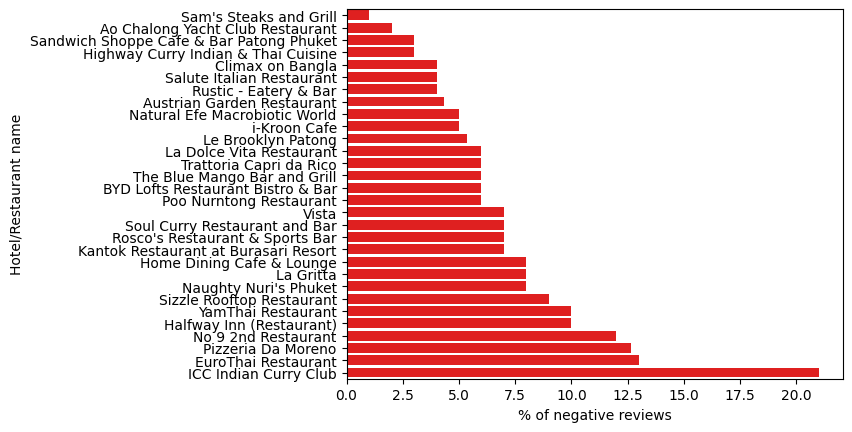

In [47]:
sns.barplot(data=neg_percent, x='% of negative reviews', y=neg_percent.index, color='r')

<Axes: xlabel='% of positive reviews', ylabel='Hotel/Restaurant name'>

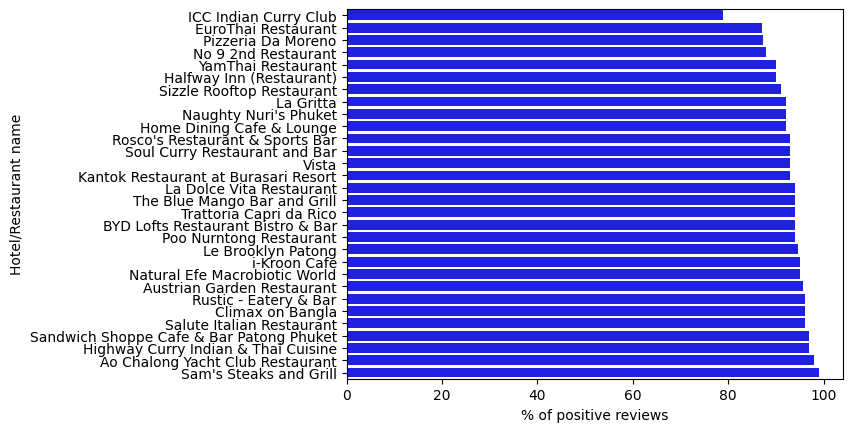

In [48]:
sns.barplot(data=pos_percent, x='% of positive reviews', y=pos_percent.index, color='b')

## Text Mining

In [49]:
def preprocess_text(text):
  # Tokenization
  tokenized_text = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  # Removing stop words
  stop_words = nltk.corpus.stopwords.words('english')
  cleaned_tokens = [word.lower() for word in tokenized_text if word.lower() not in stop_words]
  # Stemming
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [50]:
new_tm_data['preprocessed_reviews'] = new_tm_data['Review'].apply(preprocess_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\3833444814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tm_data['preprocessed_reviews'] = new_tm_data['Review'].apply(preprocess_text)


In [51]:
positive_reviews_subset = new_tm_data.loc[(new_tm_data['Hotel/Restaurant name']== 'Sam\'s Steaks and Grill') & 
                                         (new_tm_data['compound']>0),:]
negative_reviews_subset = new_tm_data.loc[(new_tm_data['Hotel/Restaurant name']== 'ICC Indian Curry Club') &
                                         (new_tm_data['compound']<=0),:]

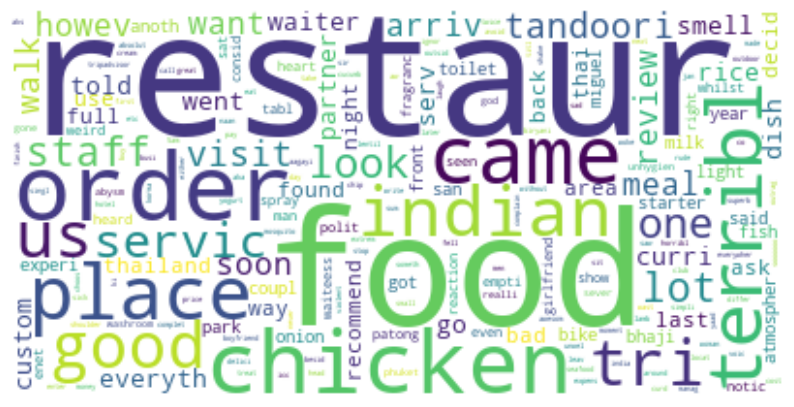

In [52]:
negative_tokens = [word for review in negative_reviews_subset['preprocessed_reviews'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(negative_tokens))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

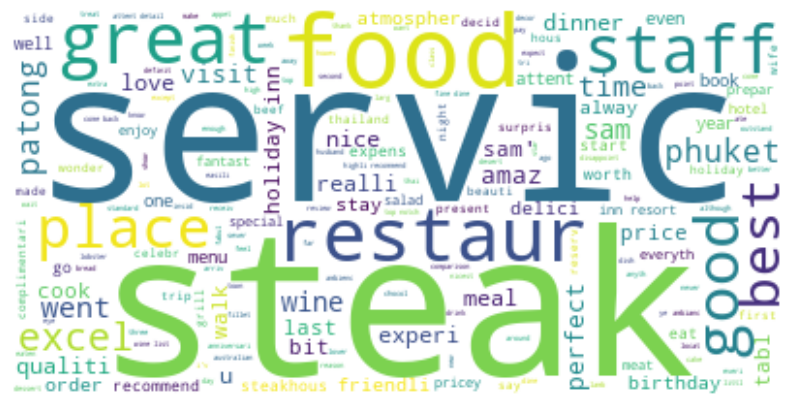

In [53]:
positive_tokens = [word for review in positive_reviews_subset['preprocessed_reviews'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(positive_tokens))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
from nltk.probability import FreqDist
pos_freqdist = FreqDist(positive_tokens)
pos_freqdist.tabulate(10)

  steak  servic    food restaur   great   staff    good   place    best   excel 
     51      49      42      37      36      30      26      23      20      19 


In [55]:
neg_freqdist = FreqDist(negative_tokens)
neg_freqdist.tabulate(10)

restaur    food   order chicken    came   place terribl  indian    good     tri 
     11       9       9       8       7       6       6       6       5       5 


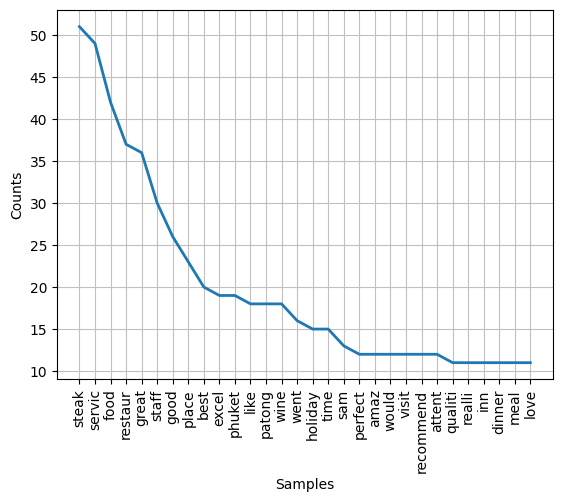

<Axes: xlabel='Samples', ylabel='Counts'>

In [56]:
pos_freqdist.plot(30)

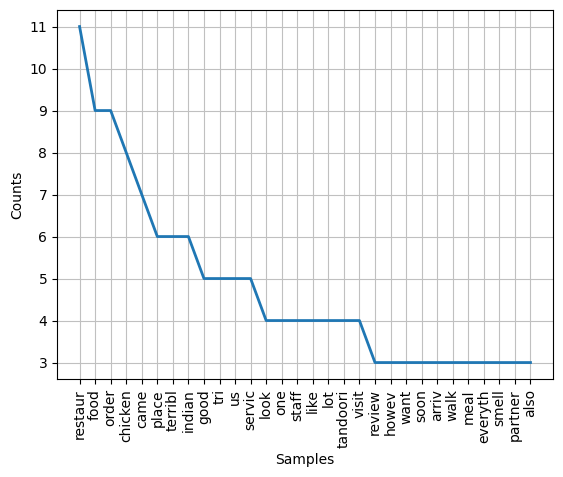

<Axes: xlabel='Samples', ylabel='Counts'>

In [57]:
neg_freqdist.plot(30)